In [3]:
from ibicus.debias import QuantileMapping
import xarray as xr
from pathlib import Path

from deepdown.utils.data_loader import DataLoader
from deepdown.utils.debiaser_utils import get_ibicus_var_name, prepare_for_ibicus
from deepdown.config import Config
from deepdown.bias_correction_classic import correct_bias
import matplotlib.pyplot as plt
import cartopy
import os
from copy import deepcopy
from deepdown.utils.plots_utils import plot_maps, get_extreme_date

import cartopy.crs as ccrs
import cartopy.feature as cfeature

from argparse import Namespace
cli_args = Namespace(config_file="../config.yaml")
config = Config(cli_args)
conf = config.config
base_config = config.get()

plot averages
Figure saved as /storage/workspaces/giub_hydro/hydro/data/tmp/plots/ALADIN63_CNRM-CM5_mean_maps.png


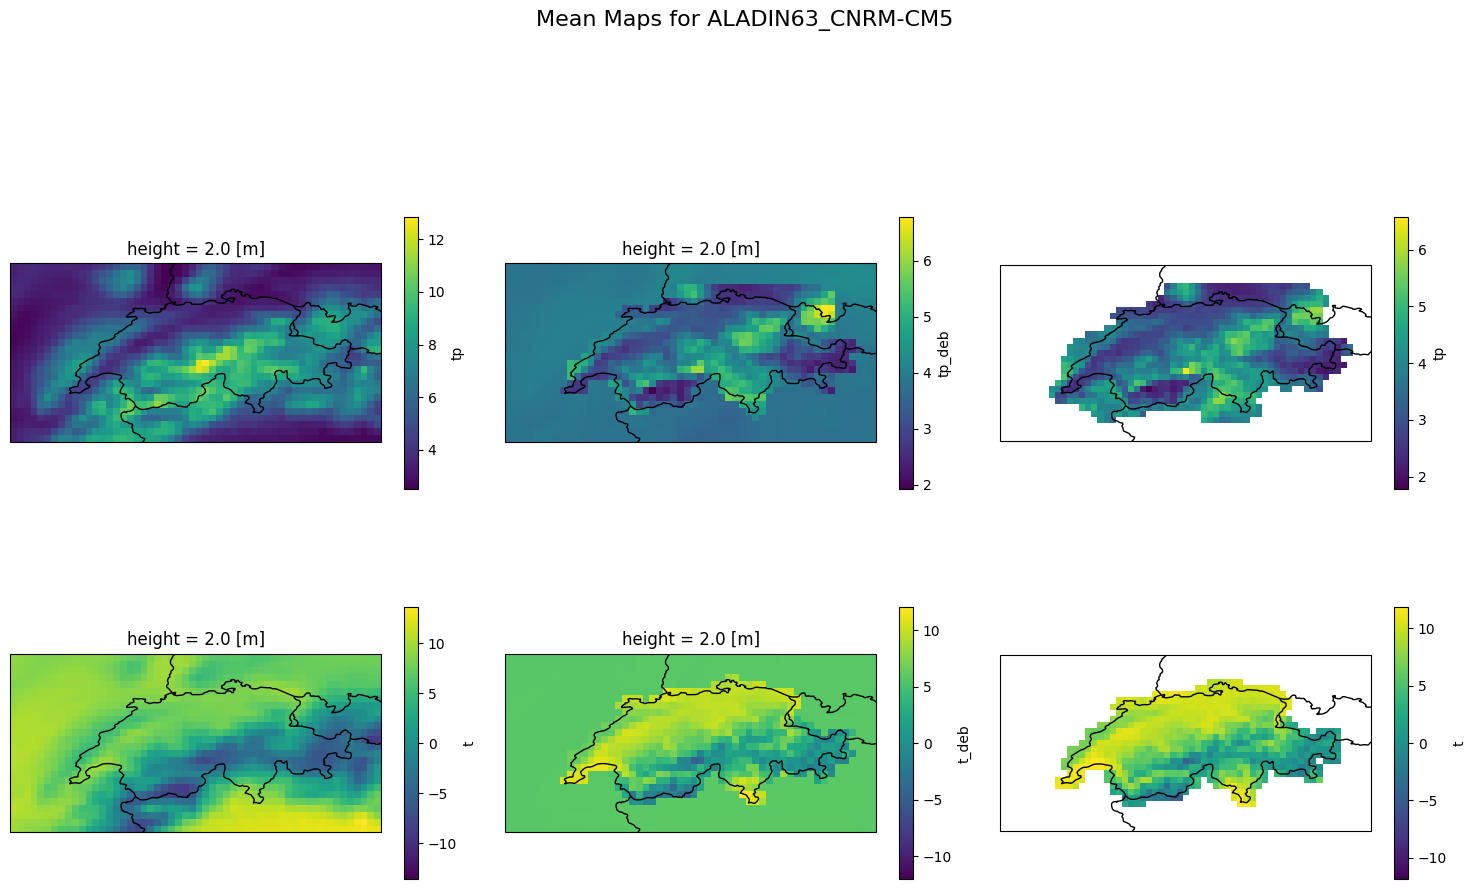

plot max values
date of maximum temp
date of maximum precipitation
Figure saved as /storage/workspaces/giub_hydro/hydro/data/tmp/plots/ALADIN63_CNRM-CM5_['t']_max_values.png


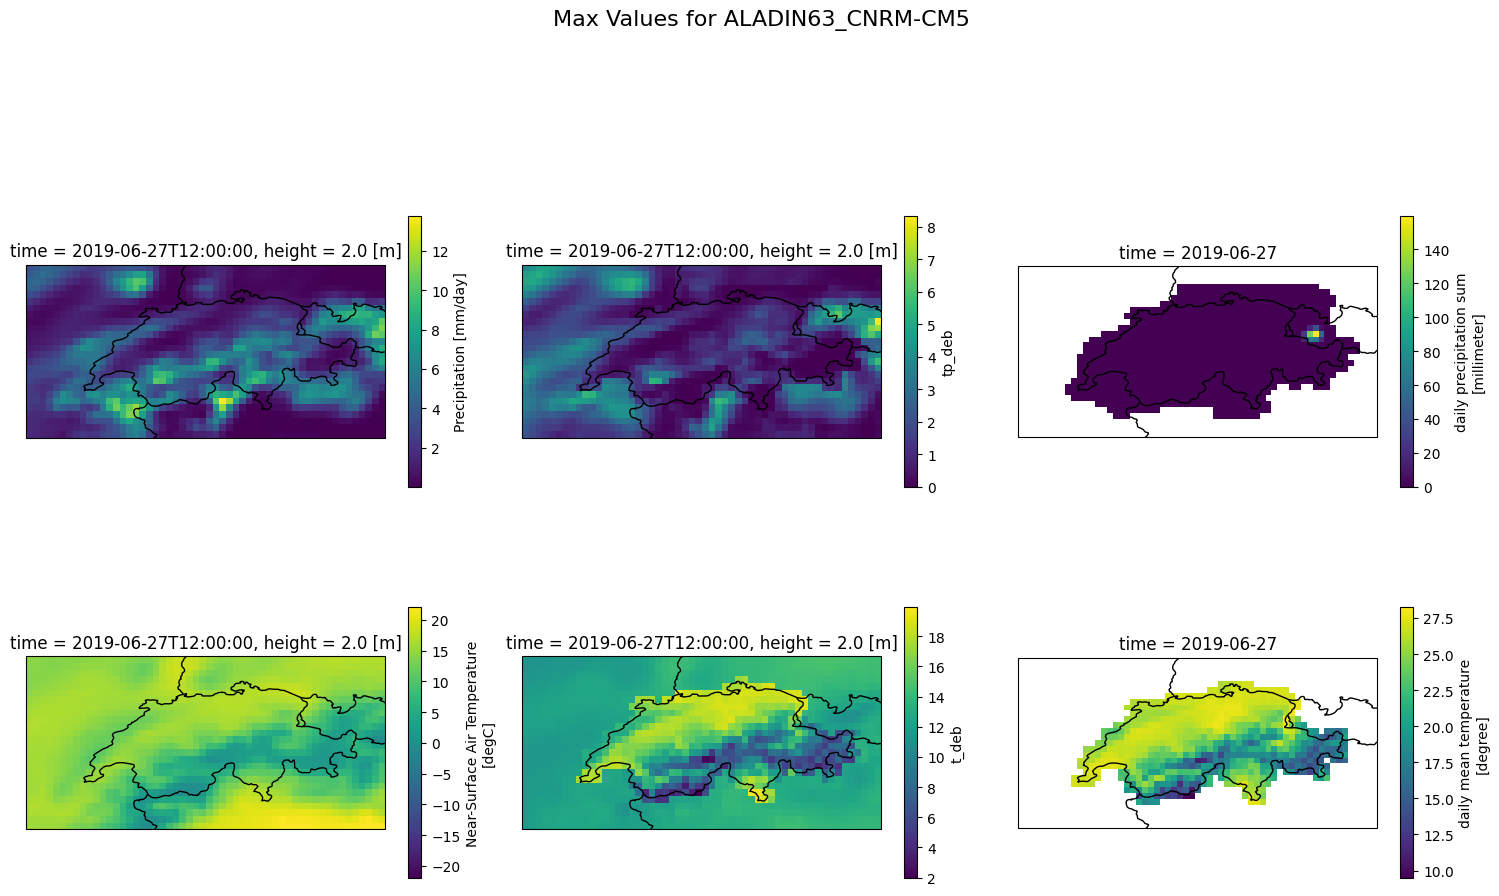

Figure saved as /storage/workspaces/giub_hydro/hydro/data/tmp/plots/ALADIN63_CNRM-CM5_['t']_max_values.png


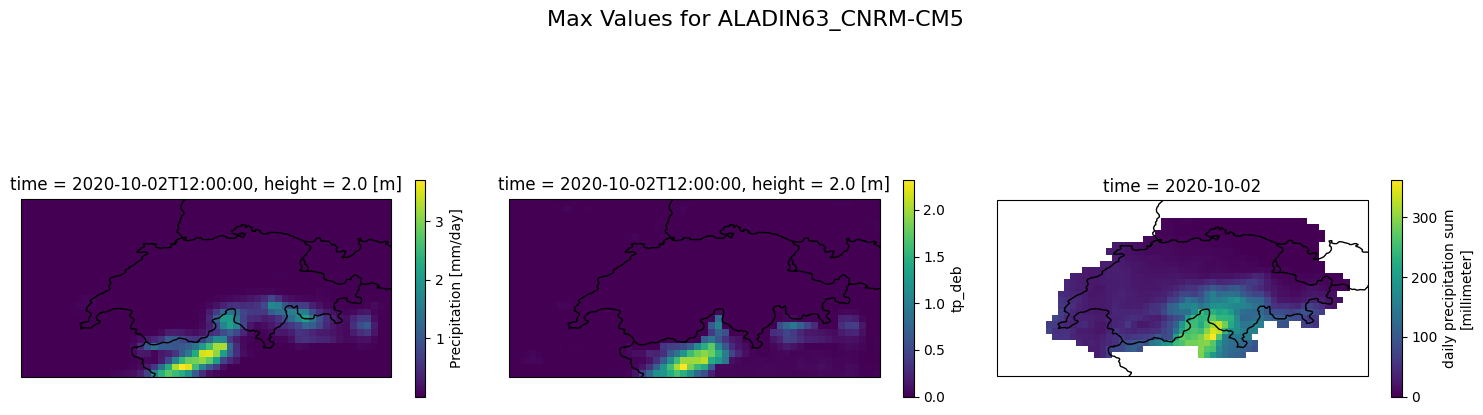

plot averages
Figure saved as /storage/workspaces/giub_hydro/hydro/data/tmp/plots/ALADIN63_MPI-ESM-LR_mean_maps.png


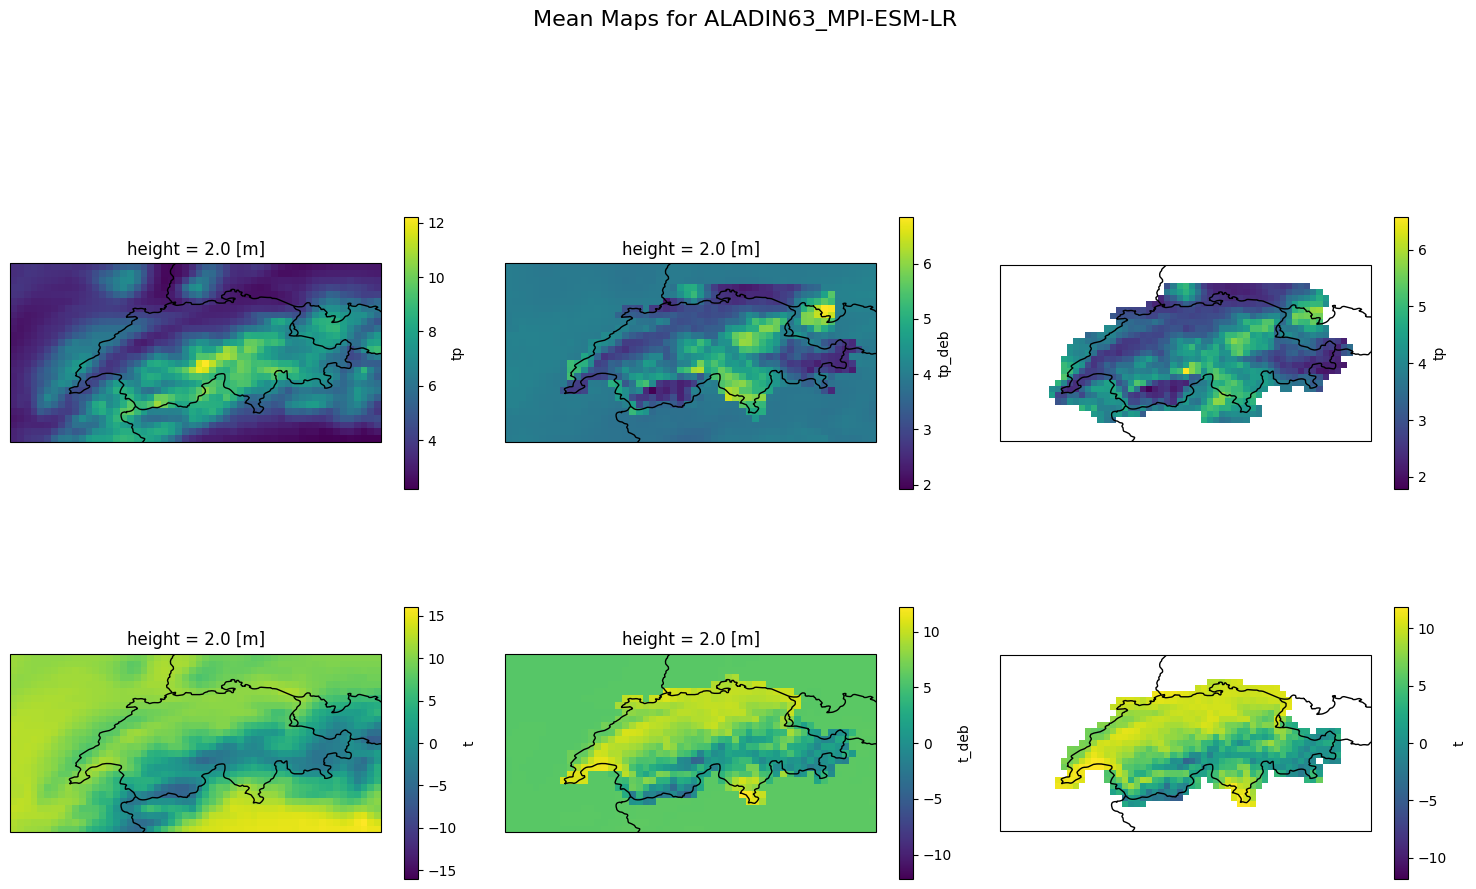

plot max values
date of maximum temp
date of maximum precipitation
Figure saved as /storage/workspaces/giub_hydro/hydro/data/tmp/plots/ALADIN63_MPI-ESM-LR_['t']_max_values.png


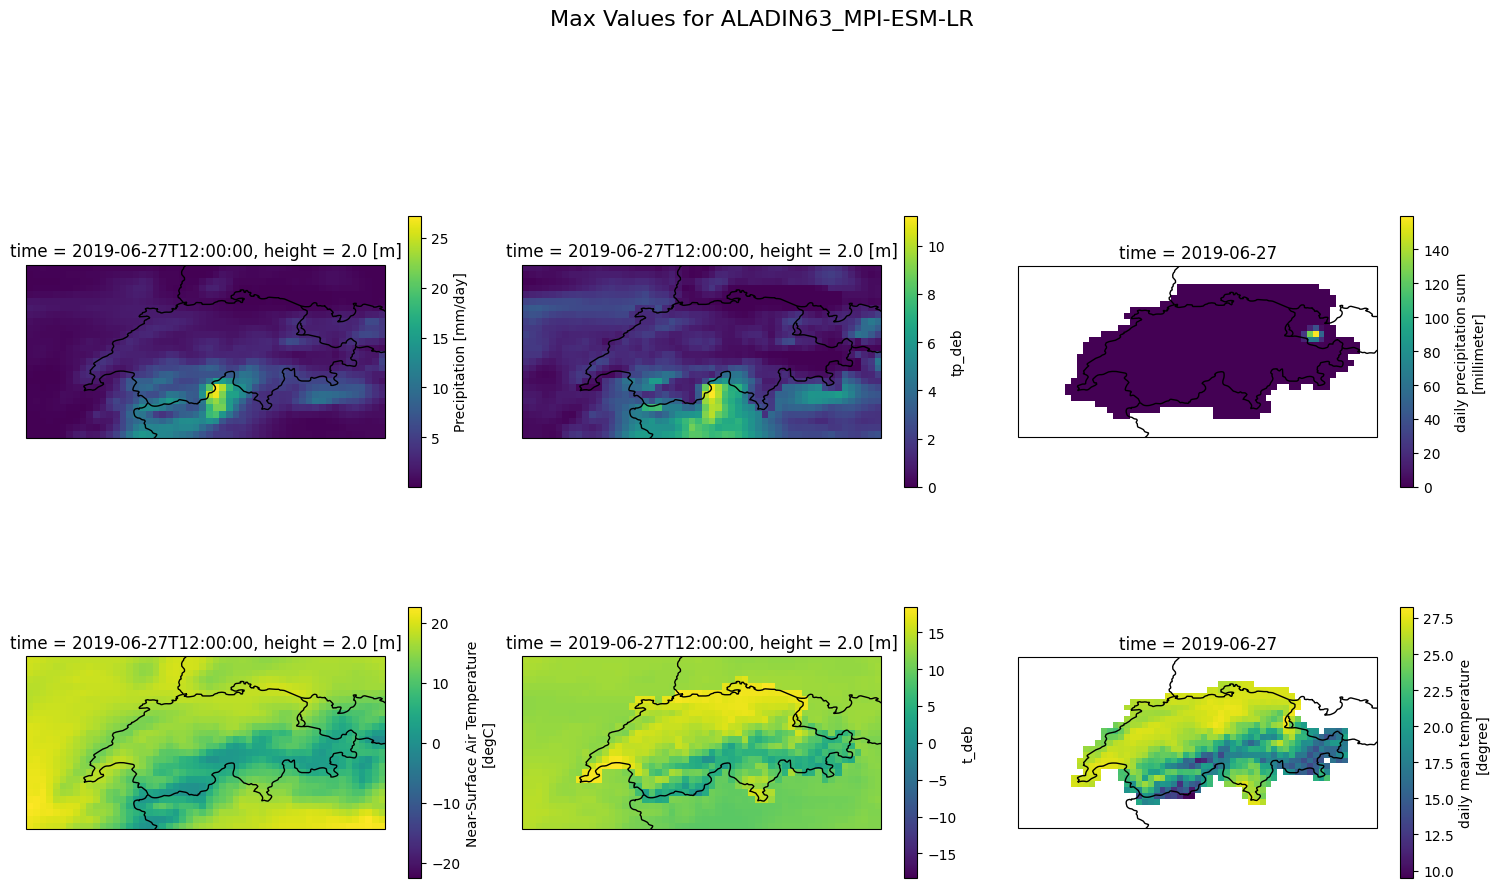

Figure saved as /storage/workspaces/giub_hydro/hydro/data/tmp/plots/ALADIN63_MPI-ESM-LR_['t']_max_values.png


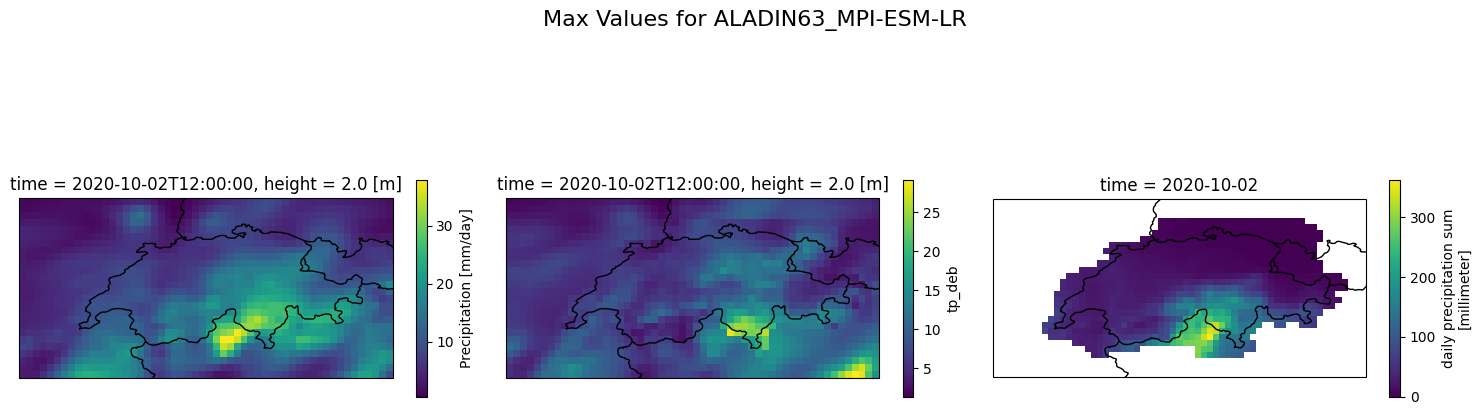

plot averages
Figure saved as /storage/workspaces/giub_hydro/hydro/data/tmp/plots/CCLM4-8-17_MIROC5_mean_maps.png


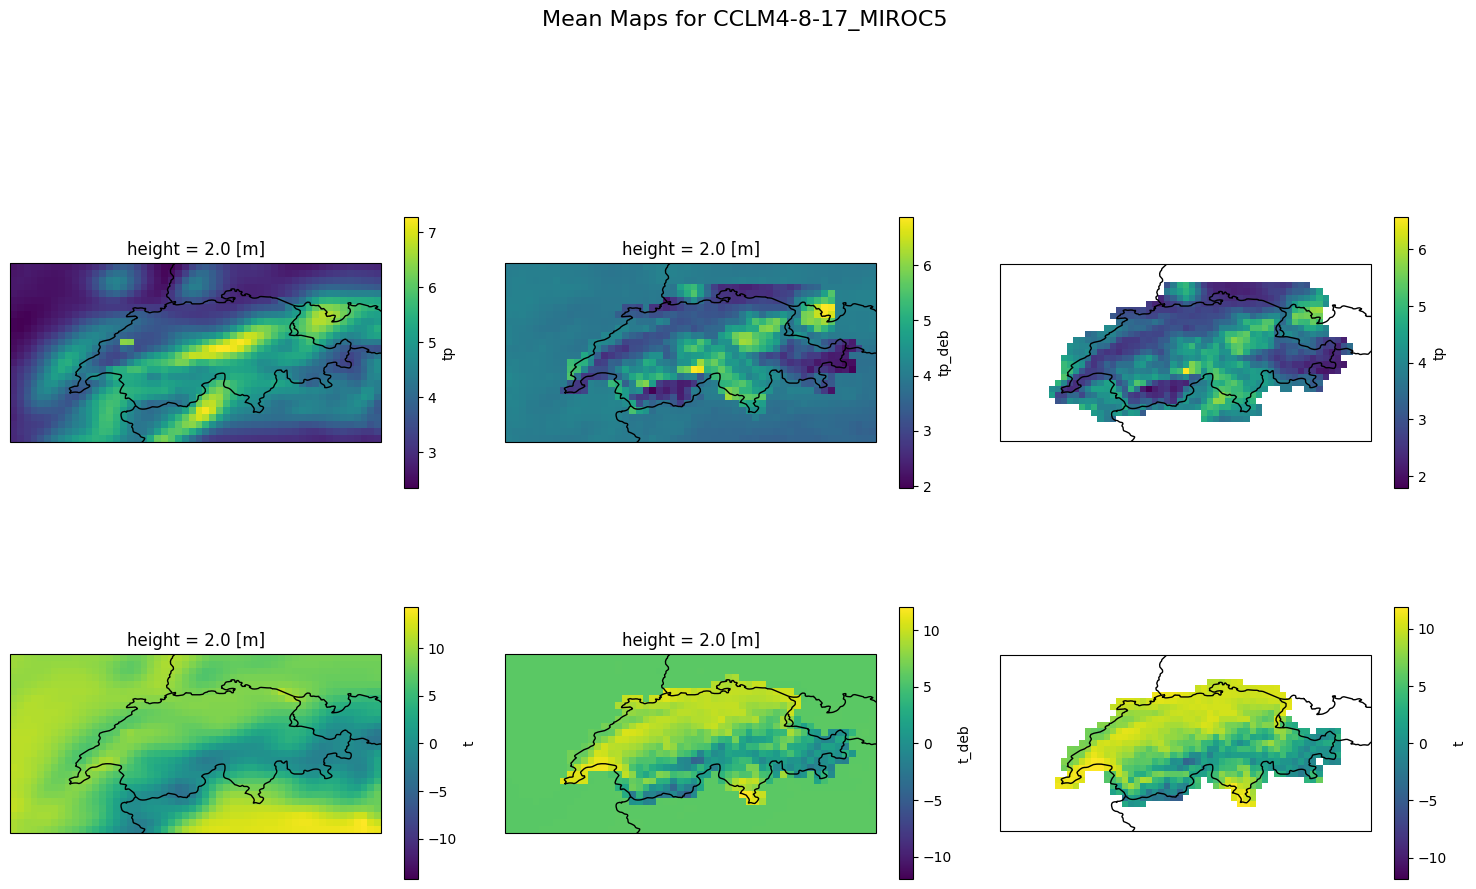

plot max values
date of maximum temp
date of maximum precipitation
Figure saved as /storage/workspaces/giub_hydro/hydro/data/tmp/plots/CCLM4-8-17_MIROC5_['t']_max_values.png


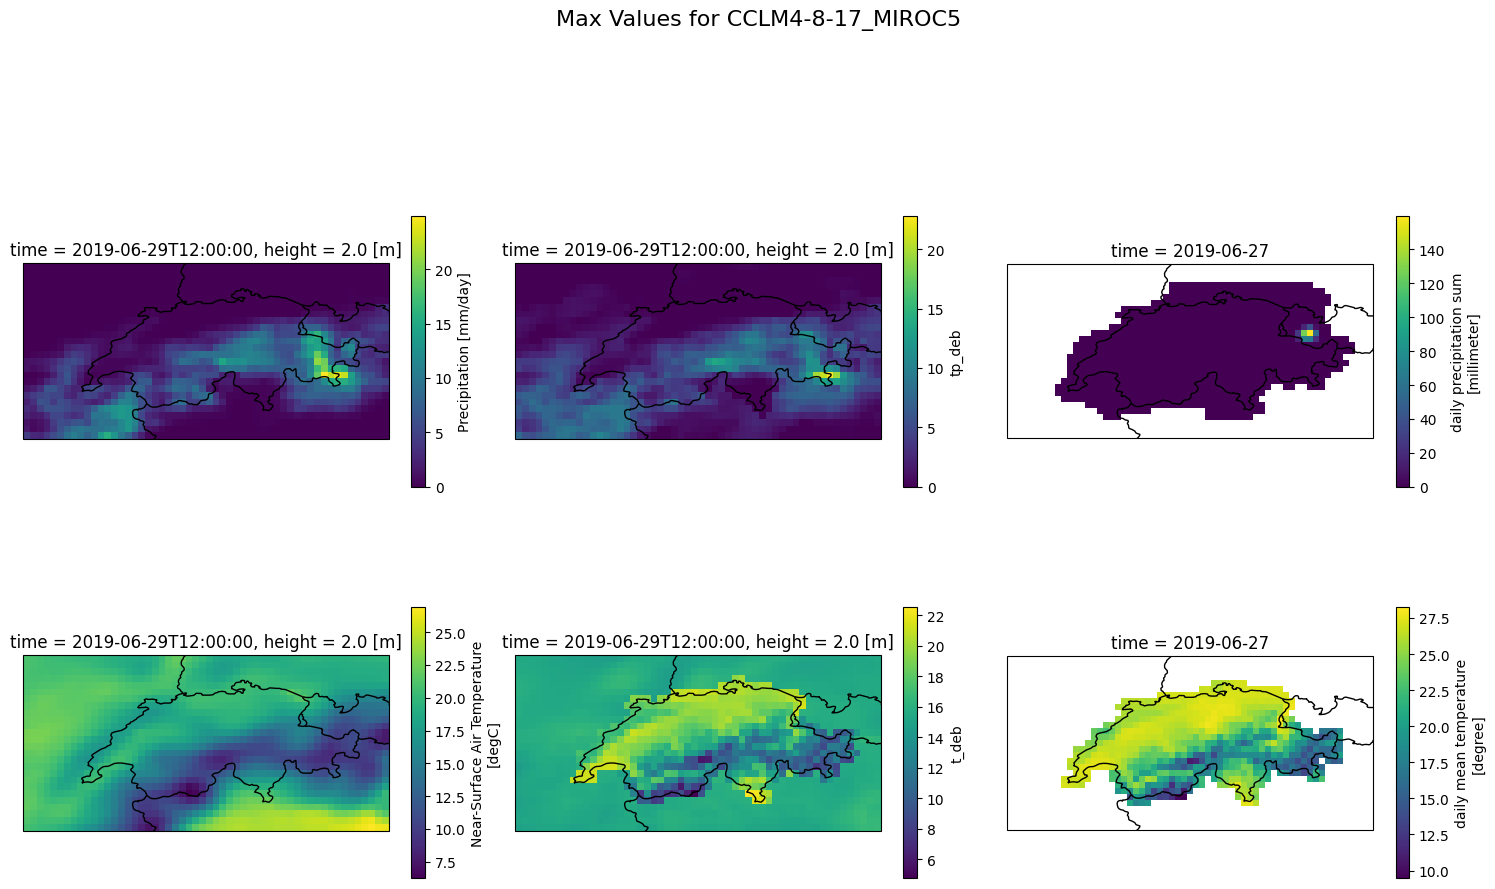

Figure saved as /storage/workspaces/giub_hydro/hydro/data/tmp/plots/CCLM4-8-17_MIROC5_['t']_max_values.png


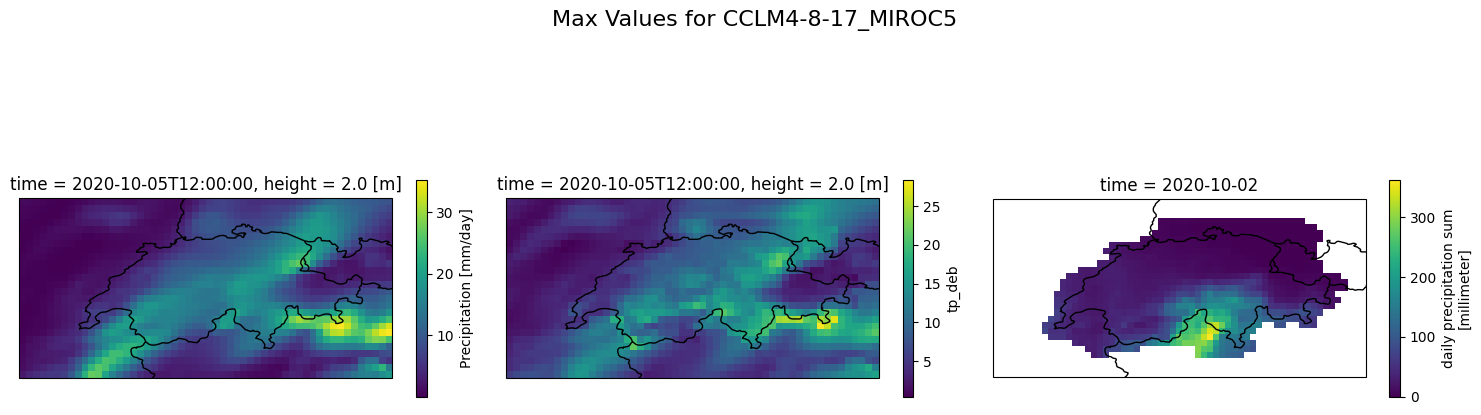

plot averages
Figure saved as /storage/workspaces/giub_hydro/hydro/data/tmp/plots/CCLM4-8-17_MPI-ESM-LR_mean_maps.png


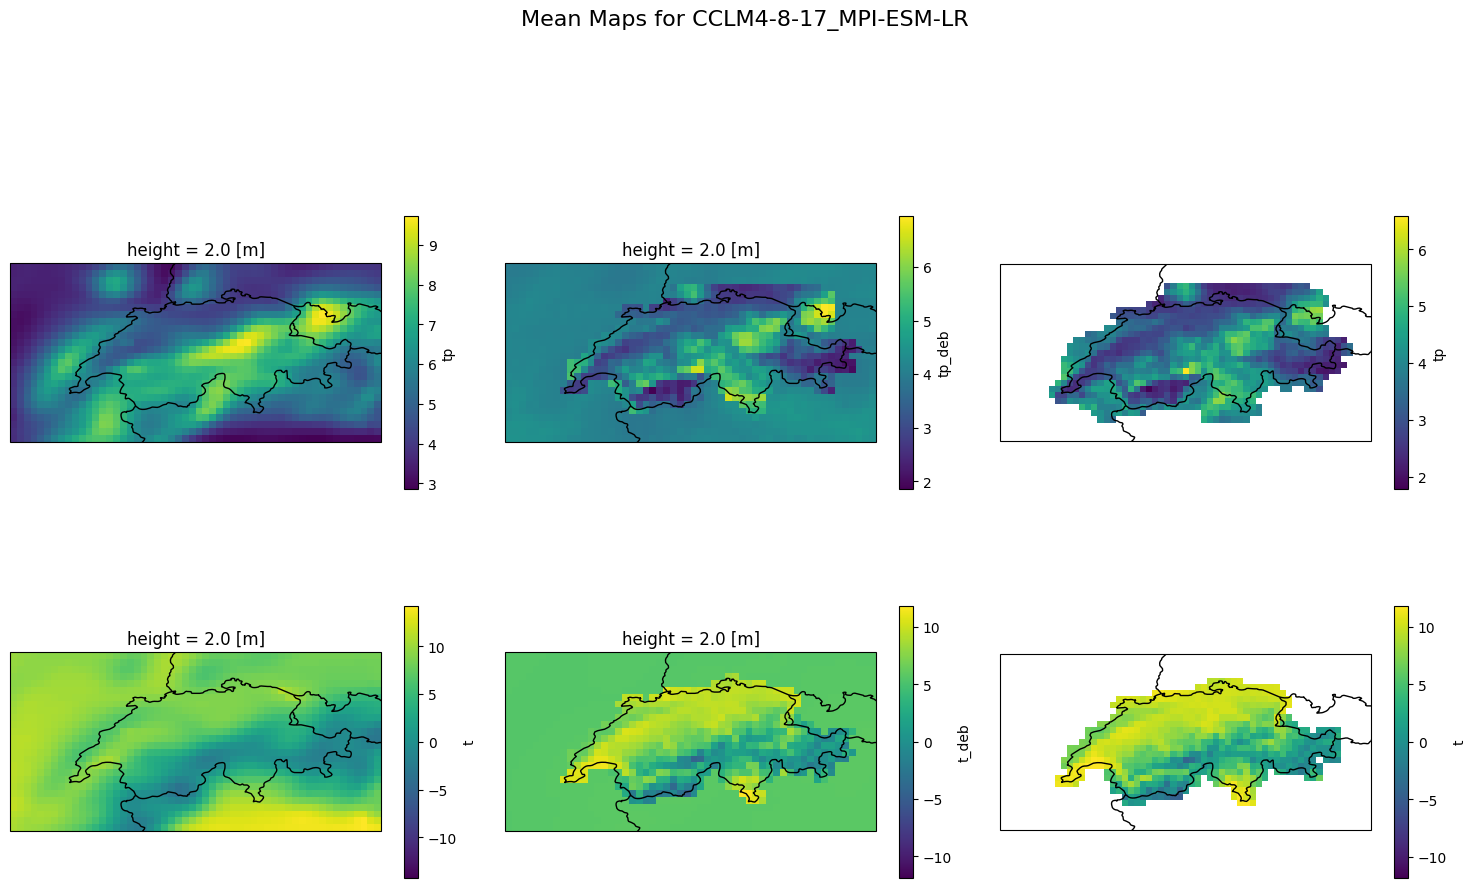

plot max values
date of maximum temp
date of maximum precipitation
Figure saved as /storage/workspaces/giub_hydro/hydro/data/tmp/plots/CCLM4-8-17_MPI-ESM-LR_['t']_max_values.png


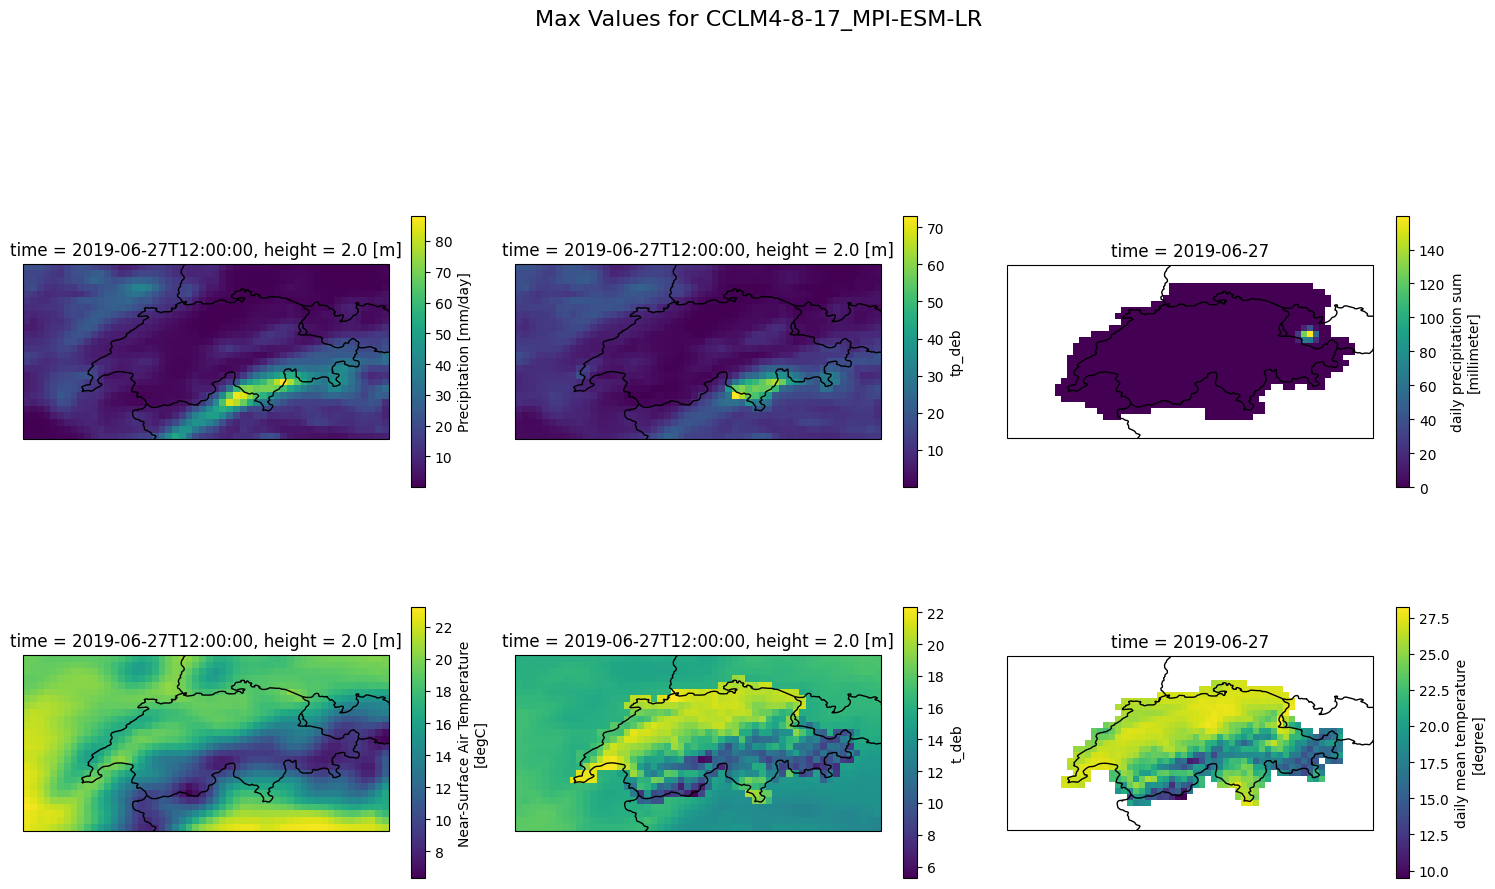

Figure saved as /storage/workspaces/giub_hydro/hydro/data/tmp/plots/CCLM4-8-17_MPI-ESM-LR_['t']_max_values.png


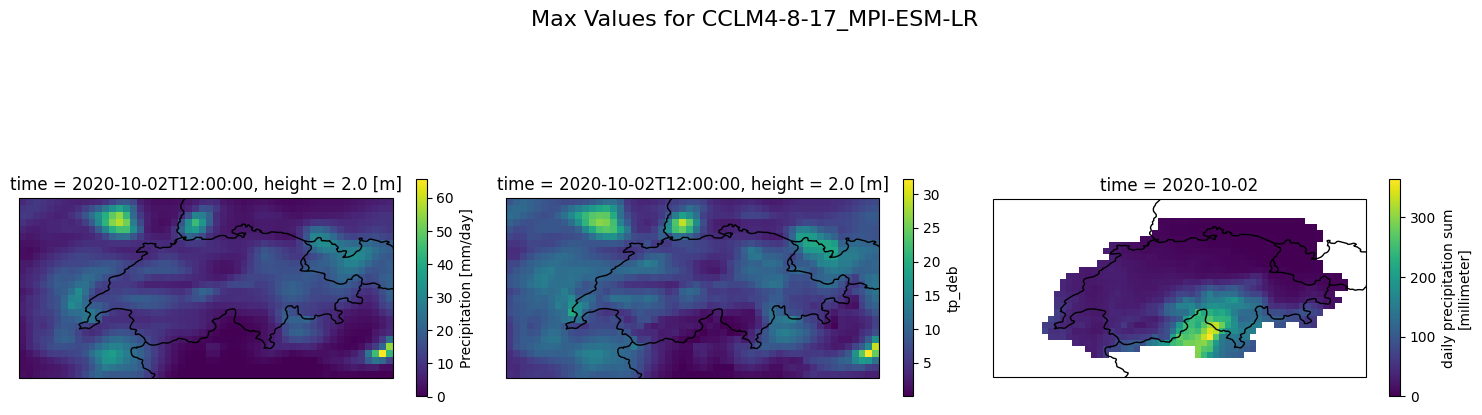

plot averages
Figure saved as /storage/workspaces/giub_hydro/hydro/data/tmp/plots/RegCM4-6_CNRM-CM5_mean_maps.png


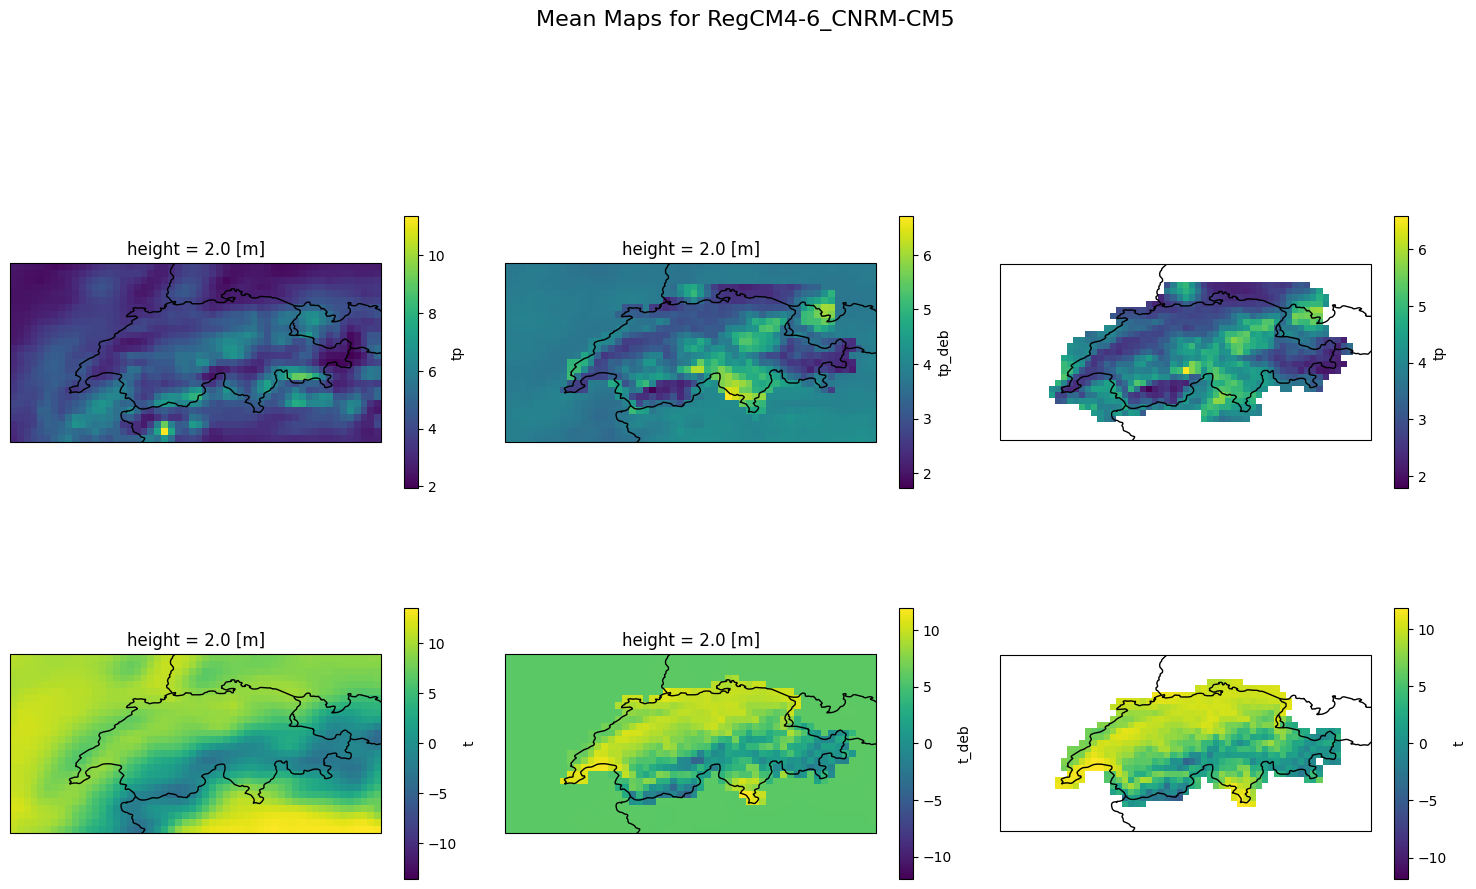

plot max values
date of maximum temp
date of maximum precipitation
Figure saved as /storage/workspaces/giub_hydro/hydro/data/tmp/plots/RegCM4-6_CNRM-CM5_['t']_max_values.png


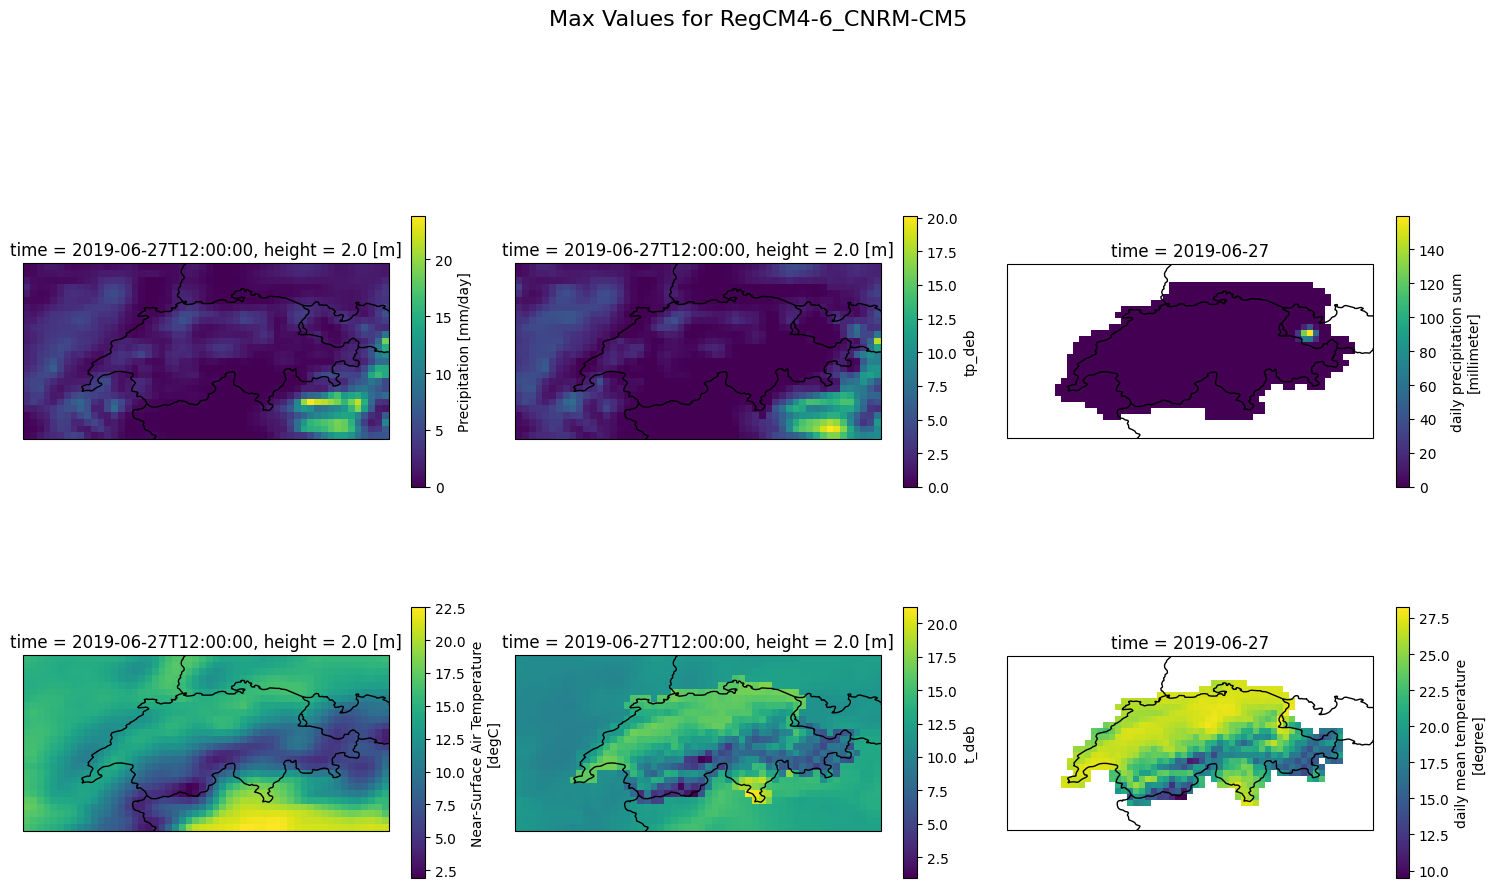

Figure saved as /storage/workspaces/giub_hydro/hydro/data/tmp/plots/RegCM4-6_CNRM-CM5_['t']_max_values.png


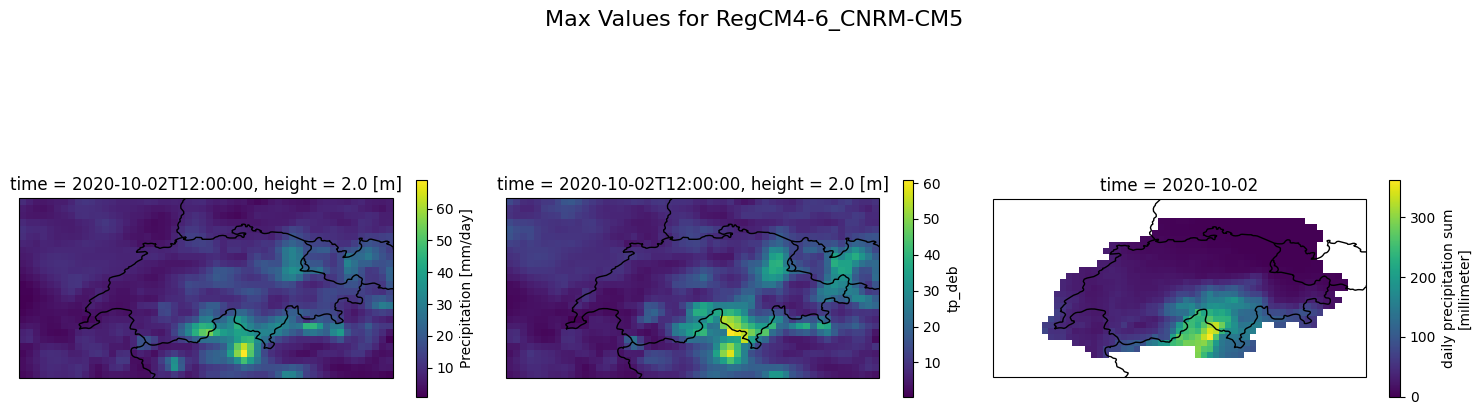

plot averages
Figure saved as /storage/workspaces/giub_hydro/hydro/data/tmp/plots/RegCM4-6_MPI-ESM-LR_mean_maps.png


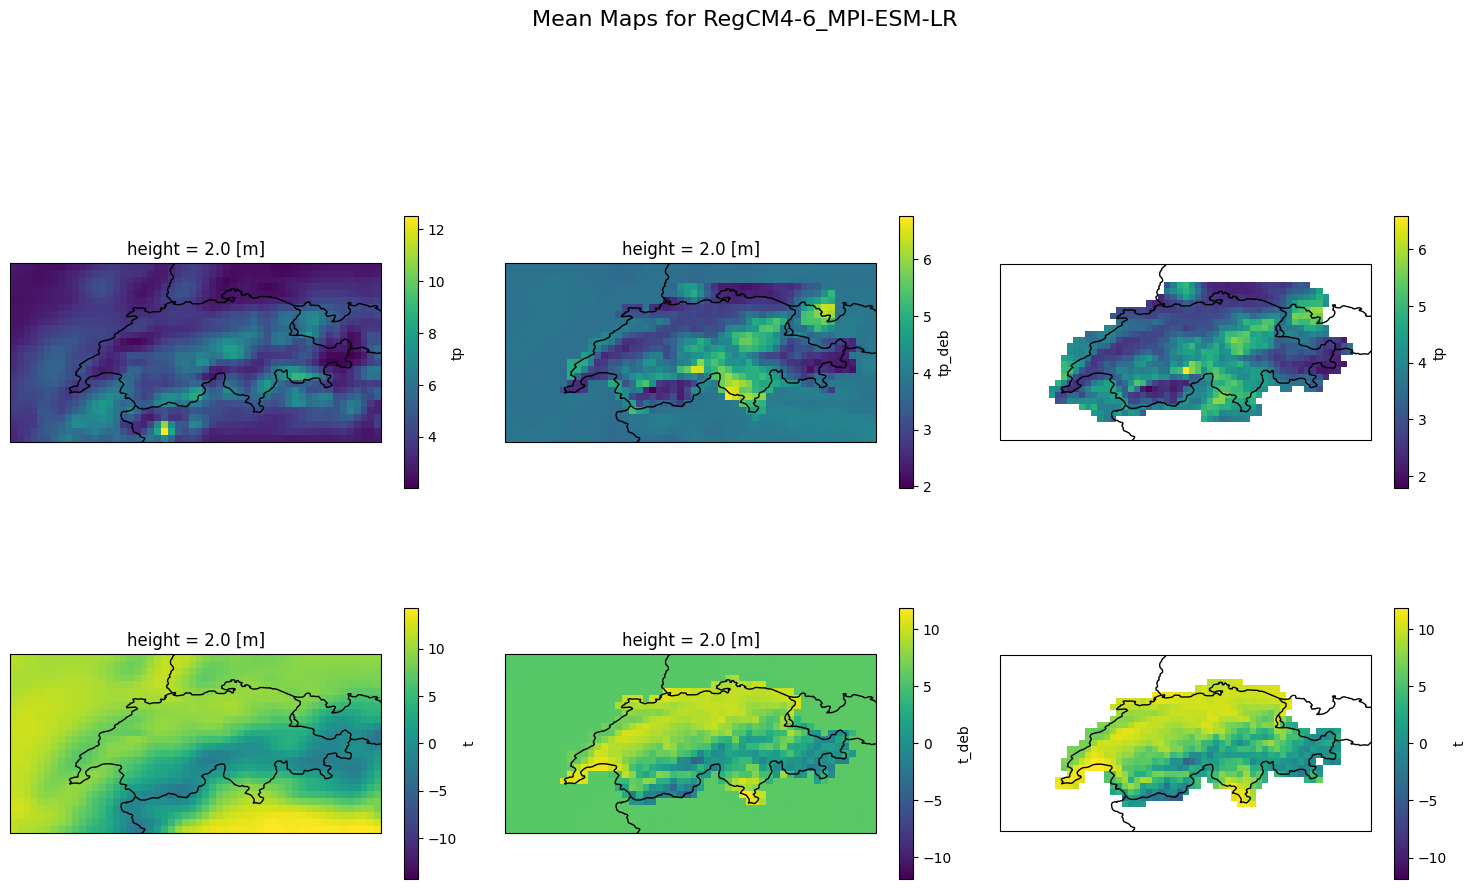

plot max values
date of maximum temp
date of maximum precipitation
Figure saved as /storage/workspaces/giub_hydro/hydro/data/tmp/plots/RegCM4-6_MPI-ESM-LR_['t']_max_values.png


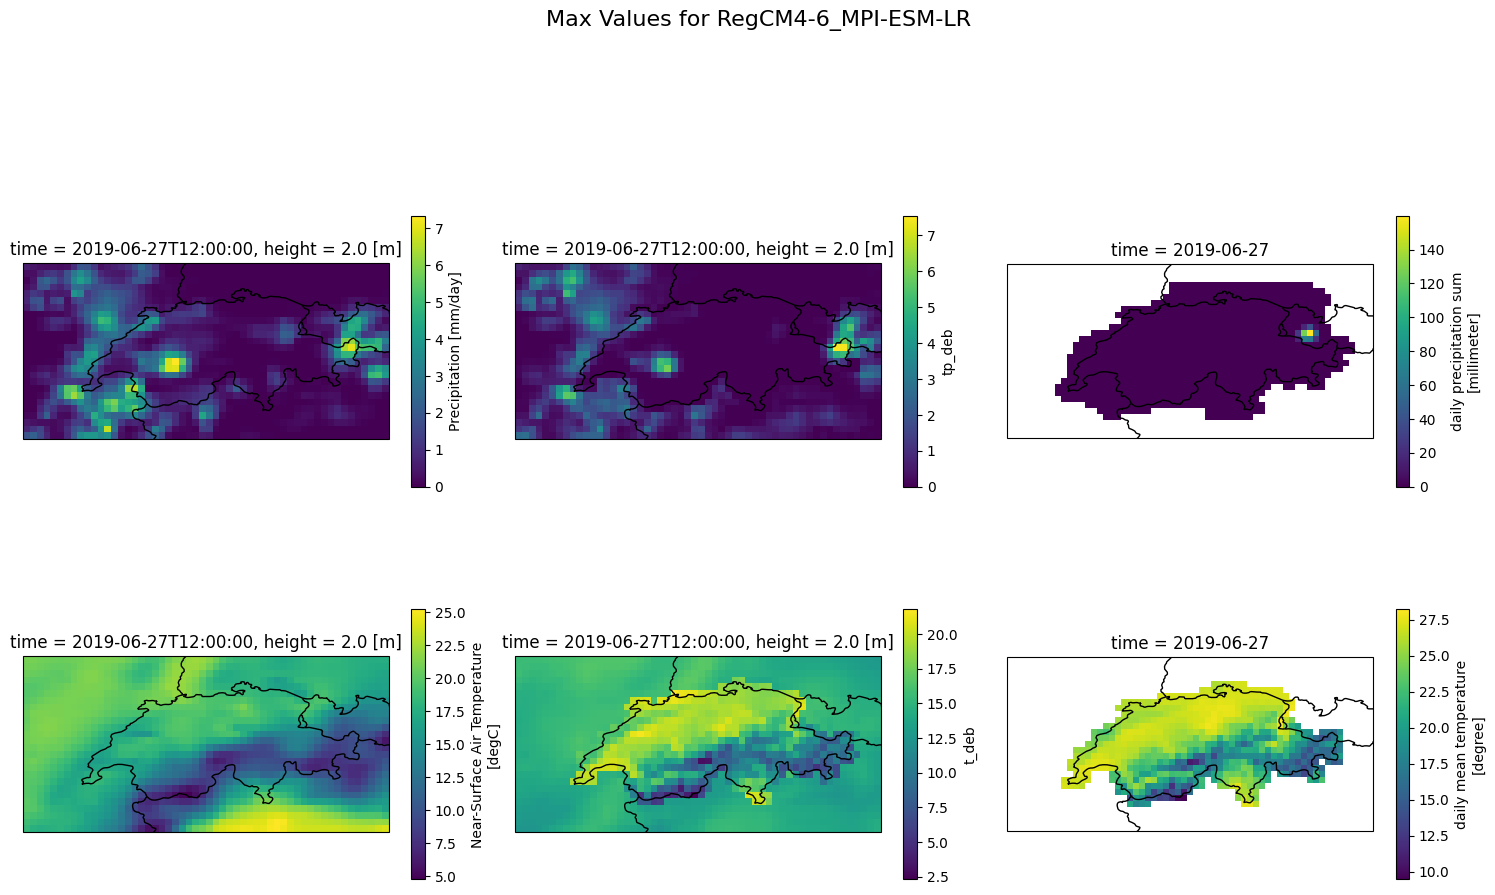

Figure saved as /storage/workspaces/giub_hydro/hydro/data/tmp/plots/RegCM4-6_MPI-ESM-LR_['t']_max_values.png


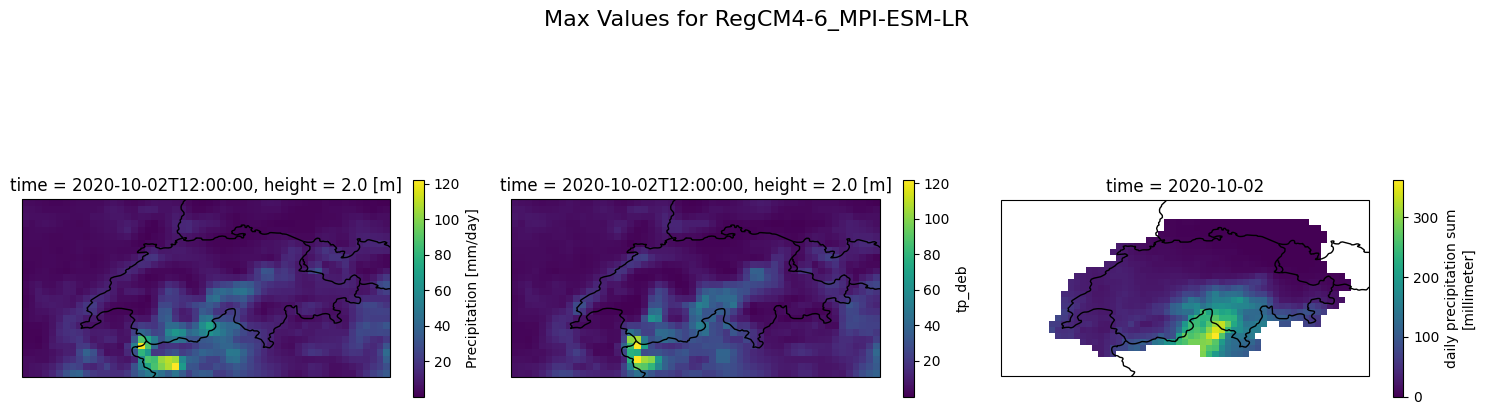

plot averages
Figure saved as /storage/workspaces/giub_hydro/hydro/data/tmp/plots/REMO2015_MIROC5_mean_maps.png


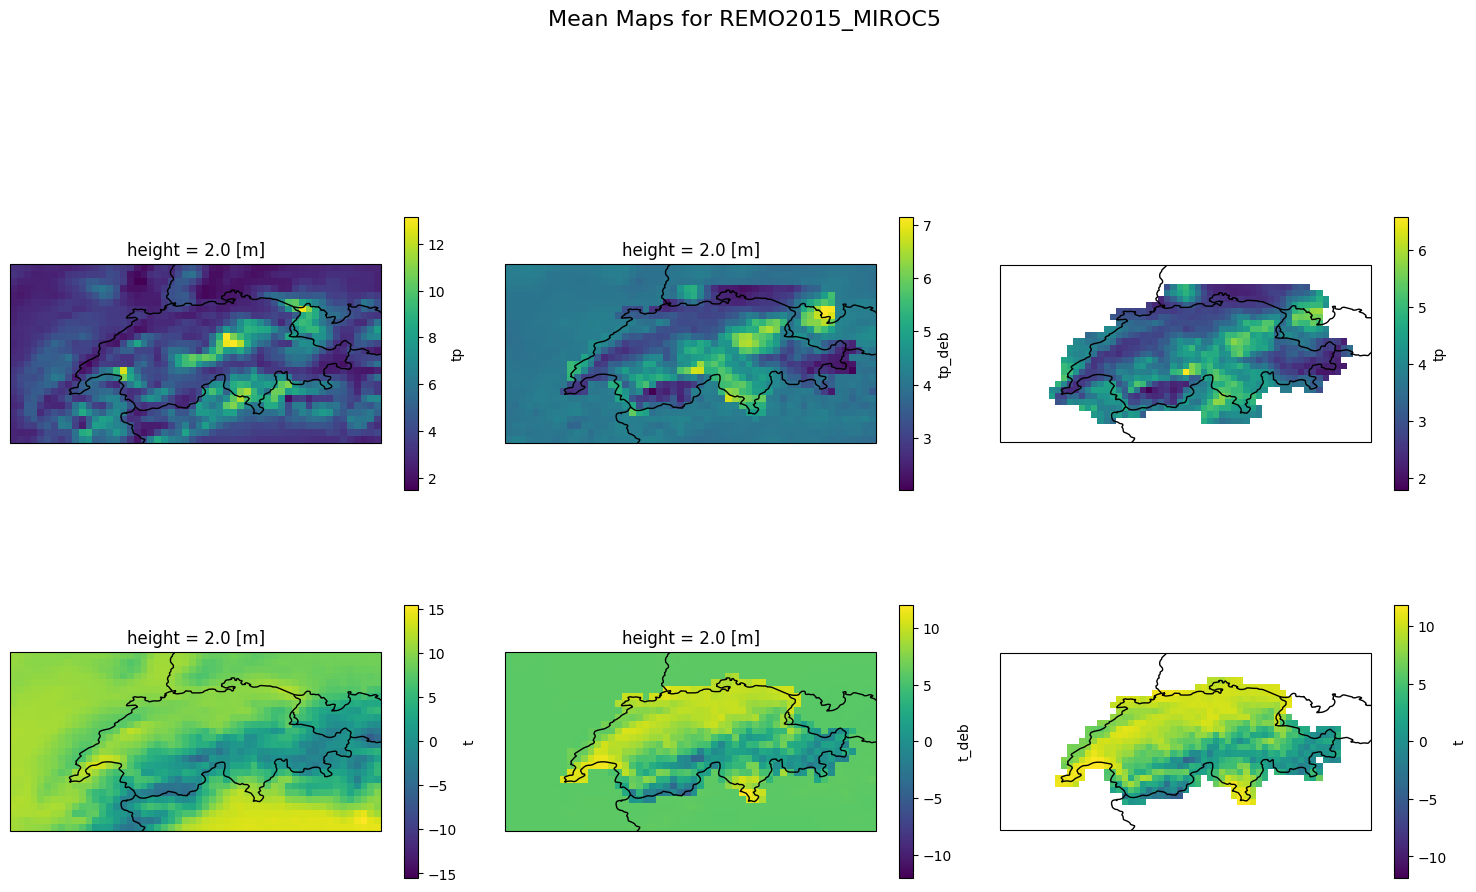

plot max values
date of maximum temp
date of maximum precipitation
Figure saved as /storage/workspaces/giub_hydro/hydro/data/tmp/plots/REMO2015_MIROC5_['t']_max_values.png


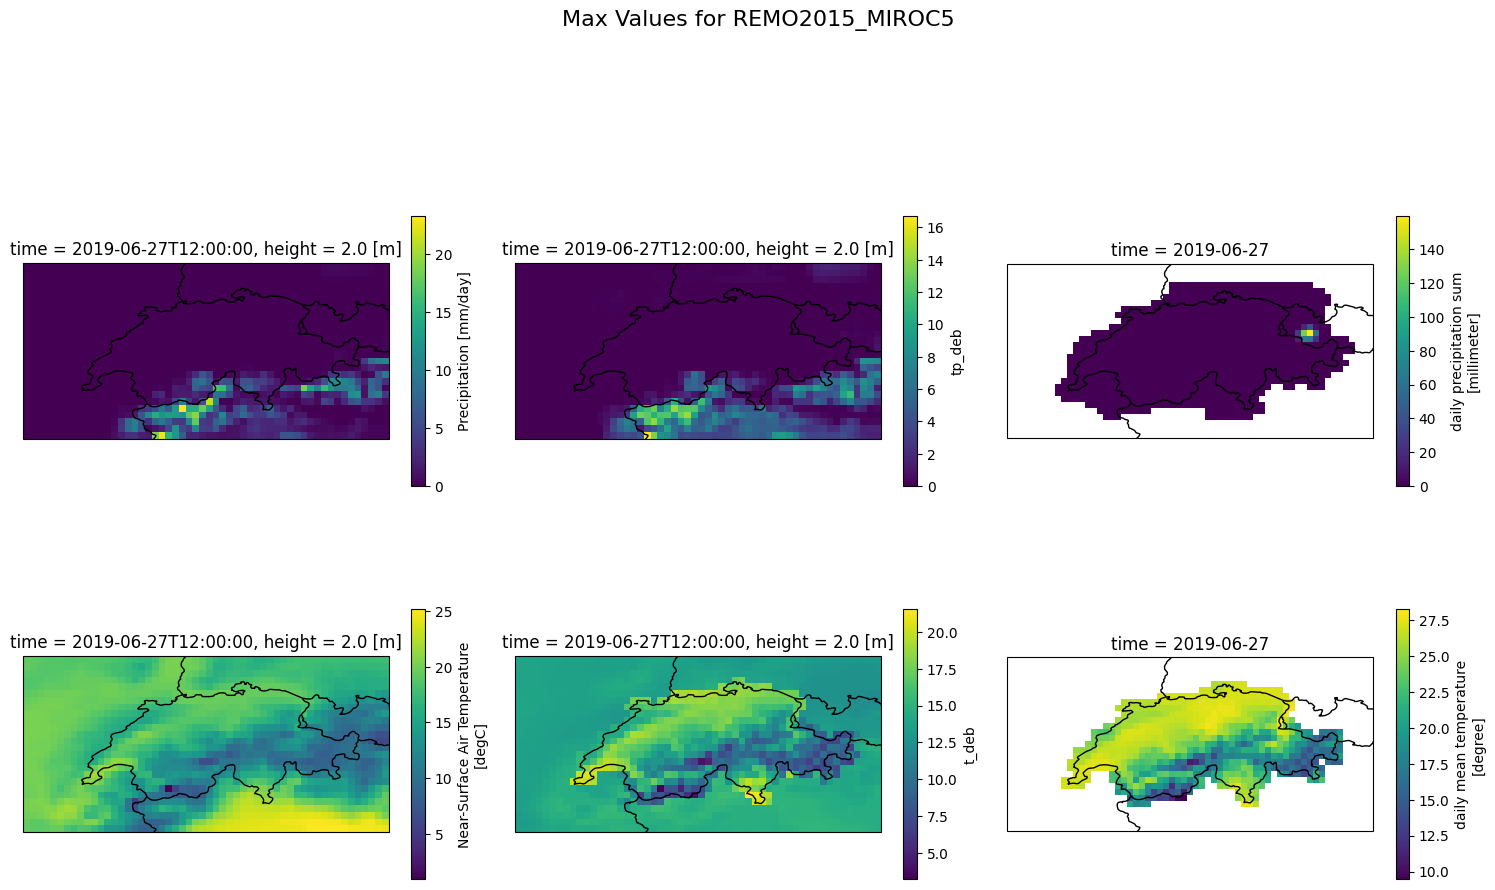

Figure saved as /storage/workspaces/giub_hydro/hydro/data/tmp/plots/REMO2015_MIROC5_['t']_max_values.png


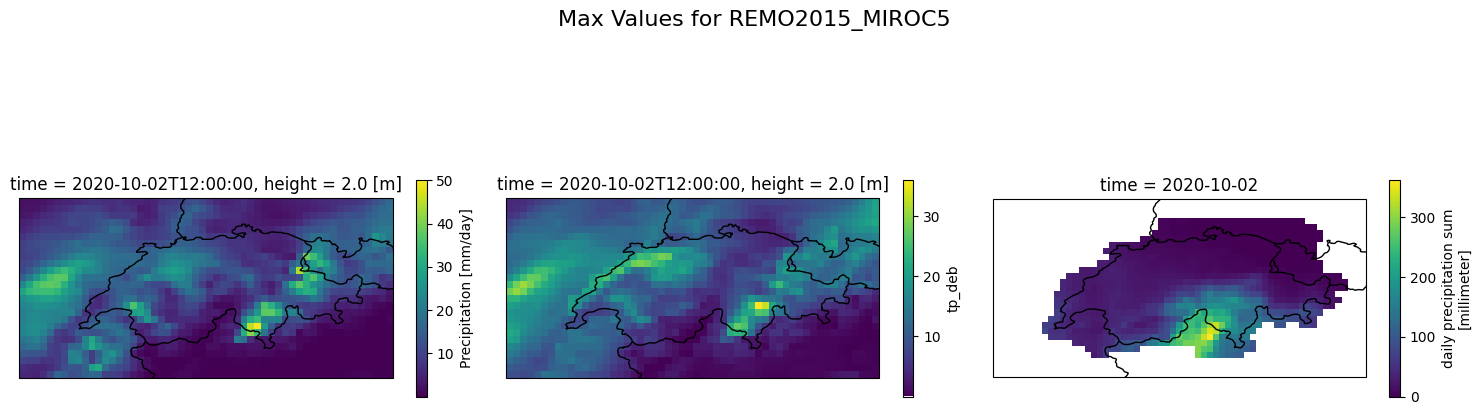

In [19]:
dir_path = Path(conf.path_output)
dir_plots = os.path.join(dir_path, 'plots')
# Define variables to plot

for rcm_model in conf.RCM:

    input_data_clim_debiased = xr.open_dataset(dir_path / f'{'RCM'}'/rcm_model/ "input_data_clim_debiased.nc")
    target_data_clim = xr.open_dataset(dir_path /"target_clim_period.nc")
    input_data_clim_debiased = input_data_clim_debiased.rename_vars({'pr':'tp', 'pr_deb':'tp_deb','tas':'t','tas_deb':'t_deb'})
    # change of units when needed
    input_data_clim_debiased['t_deb']=input_data_clim_debiased['t_deb']-273.15
    input_data_clim_debiased['tp_deb']=input_data_clim_debiased['tp_deb']*86400

    print("plot averages")
    input_mean_clim_debiased = input_data_clim_debiased.mean(dim="time")
    target_mean_clim = target_data_clim.mean(dim="time")
    title = f'Mean Maps for {rcm_model}'
    fig_name = f'{dir_plots}/{rcm_model}_mean_maps.png'
    variables = ['tp', 't'] 
    # Plot the mean maps
    plot_maps(input_mean_clim_debiased, variables, target_mean_clim, title=title, fig_name=fig_name)


    print("plot max values")
    date_tmax = get_extreme_date(target_data_clim, 't')   
    print("date of maximum temp")
    date_premax = get_extreme_date(target_data_clim, 'tp')   
    print("date of maximum precipitation")
    # Plot maps for the maximum values
    title = f'Max Values for {rcm_model}'
    variablees = ['t']
    plot_maps(input_data_clim_debiased, variables, target_data_clim, date = date_tmax, title=title, fig_name=f'{dir_plots}/{rcm_model}_{variablees}_max_values.png')
    variables = ['tp']
    plot_maps(input_data_clim_debiased, variables ,target_data_clim, date = date_premax, title=title, fig_name=f'{dir_plots}/{rcm_model}_{variablees}_max_values.png')



In [15]:
t = get_extreme_date(target_data_clim, 't')   